In [1]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 14.2 MB/s eta 0:00:00


In [2]:
!pip install --upgrade opencv-python numpy easyocr pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import easyocr
import sqlite3
import os
import cv2
import re
from PIL import Image
from IPython.display import Image, display
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# INITIALIZING THE EasyOCR READER
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [2]:
def upload_data():
  uploaded = files.upload()

In [6]:
upload_data()

Saving 5.png to 5.png


In [9]:
image_path = '1.png'
image = cv2.imread(image_path)
res = reader.readtext(image_path)

In [10]:
def image_preview(image, res):
    for (bbox, text, prob) in res:
        # unpack the bounding box
        (tl, tr, br, bl) = bbox
        tl = (int(tl[0]), int(tl[1]))
        tr = (int(tr[0]), int(tr[1]))
        br = (int(br[0]), int(br[1]))
        bl = (int(bl[0]), int(bl[1]))
        cv2.rectangle(image, tl, br, (0, 255, 0), 2)
        # cv2.putText(image, text, (tl[0], tl[1] - 10),
        #             cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.axis('off')
    plt.imshow(image)

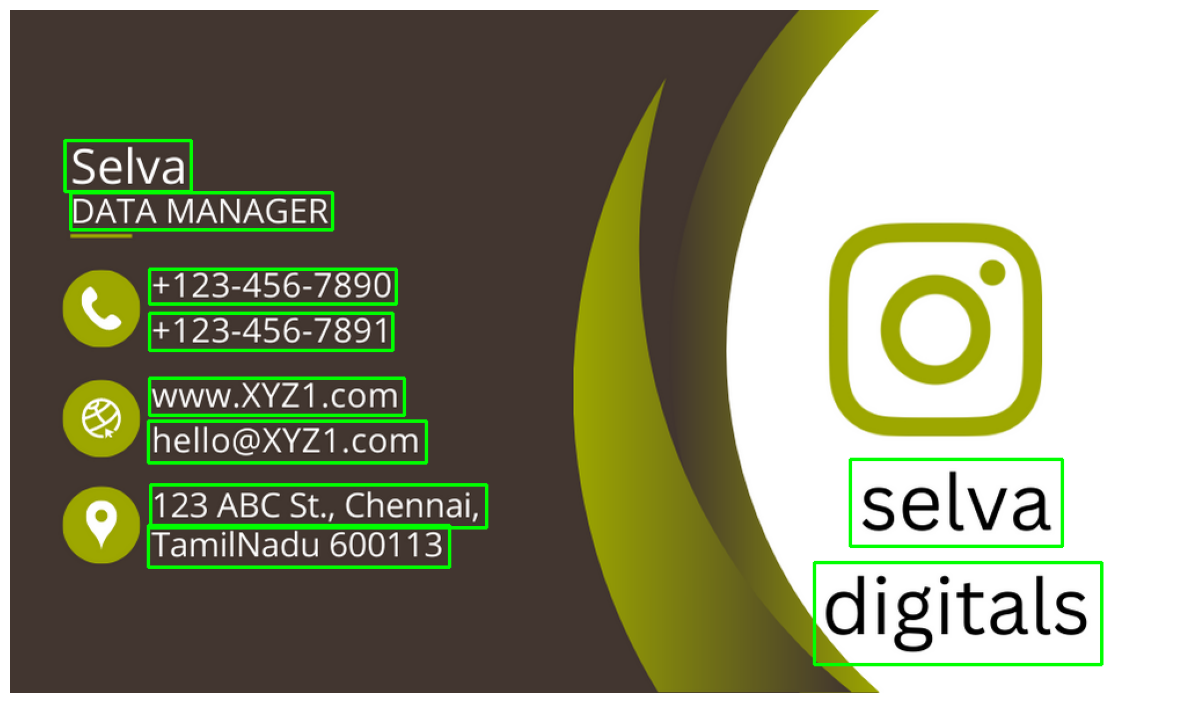

In [11]:
image_preview(image, res)

In [12]:
def extract_info(image_data):
    # display_image(image_data)
    # Load the image using OpenCV
    img = cv2.imread(f'{image_data}.png')


    # Use EasyOCR to extract text from the image
    read = easyocr.Reader(['en'])
    result = read.readtext(img, detail=0, paragraph=True)

    l = " ".join(result)
    # print(l)

    k = {'company': "", 'Name': "", 'Designation': "", 'Number': "", 'Email': "", 'Website': "", 'Area': "",'City': "",'State': "",'Pincode': ""}


    url = re.findall(r"[www|WWW|wwW]+[\.|\s]+[a-zA-Z0-9]+[\.|\][a-zA-Z]+",l)

    website = re.sub('[WWW|www|wwW]+ ','www.', url[0])
    k["Website"] = website

    email = re.findall(r"[a-zA-Z0-9\.\-+_]+@[a-zA-Z0-9\.\-+_]+\.[a-z]+",l)
    k["Email"]=email[0]

    mobile_numbers = re.findall(r"[6-9]\d{9}|[\+9]\d{12}|[\+91]+\-\d{3}\-\d{4}|[\+1-2]\d{3}\-\d{3}\-\d{4}|[1-2]\d{2}\-\d{3}\-\d{4}",l)
    # a = []
    try:
        if mobile_numbers[1] is not None:
            mobile_number = ', '.join(mobile_numbers)
            k['Number']=mobile_number
        else:
            mobile_number = mobile_numbers[0]
            k['Number']=mobile_number
    except IndexError:
        mobile_number = mobile_numbers[0]
        k['Number']=mobile_number

    name_and_position = result[0]
    # print(name_and_position)

    designation = re.findall(r"[A-Za-z]+[\s|\s\&\s]+[A-Za-z]+$",name_and_position)
    k['Designation']=designation[0]
    # print(designation)

    card_holder_name =  name_and_position.replace(designation[0],'').title()
    k['Name']=card_holder_name
    # print(card_holder_name)
    address = re.findall(r"([0-9]{1,4}\s[A-za-z]+\s[A-za-z]+)[\s|\.|\,]\,\s([A-za-z]+)[\|\,|\;]\s([A-za-z]+)[\,\s|\,\s|\;\s|\s]+([0-6]{5,7})",l)
    # print(address)
    area = address[0][0]
    k['Area']=area
    # print(area)
    city = address[0][1]
    k['City']=city
    # print(city)
    state = address[0][2]
    k['State']=state
    # print(state)
    pincode = address[0][3]
    k['Pincode']=pincode
    # print(pincode)
    for i in result:
        if url[0] in i:
                j=result.index(i)
                del(result[j])
        elif email[0] in i:
                j=result.index(i)
                del(result[j])
    company_name = result[-1].title()
    k['company']=company_name



    return [k]


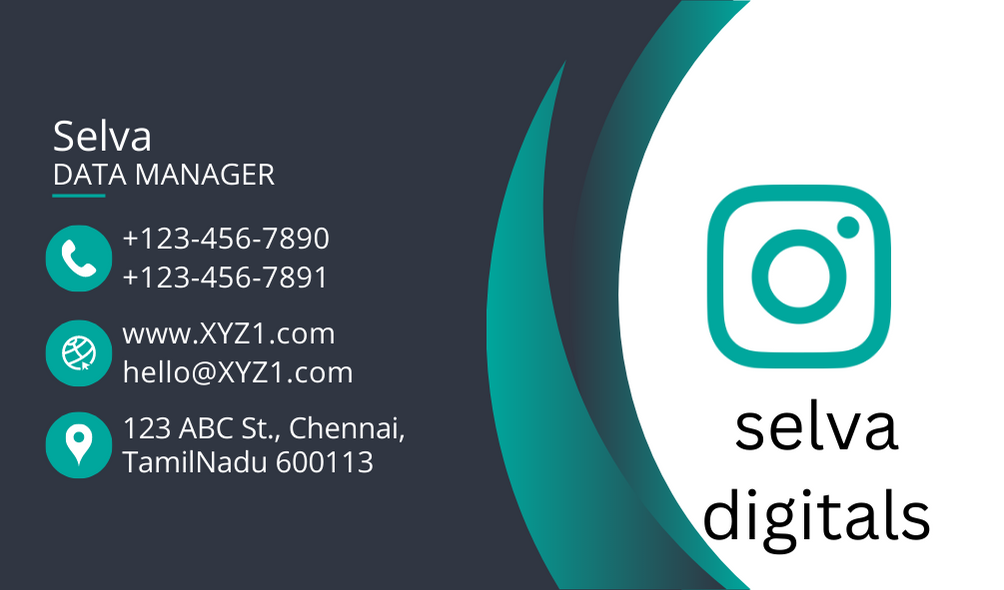

,company,Name,Designation,Number,Email,Website,Area,City,State,Pincode
0,Selva Digitals,Selva,DATA MANAGER,"+123-456-7890, +123-456-7891",hello@XYZ1.com,www.XYZI.com,123 ABC St,Chennai,TamilNadu,600113


In [13]:
image_path = '1.png'
# Display the PNG image
display(Image(filename=image_path))
a=pd.DataFrame(extract_info(1))
a

In [28]:
dat=extract_info(2)
data=dat[0]
data

{'company': 'Global Insurance',
 'Name': 'Amit Kumar ',
 'Designation': 'CEO & FOUNDER',
 'Number': '123-456-7569',
 'Email': 'hello@global.com',
 'Website': 'www.global.com',
 'Area': '123 global St',
 'City': 'Erode',
 'State': 'TamilNadu',
 'Pincode': '600115'}

In [36]:
new_data = {
    'Email': 'hello@gmail.com',
    'Website': 'www.abcd.com',
    'City': 'Tirunelveli'
}

In [39]:
def update_values(data, new_data):
    updated_data = data.copy()

    for key, value in new_data.items():
        if key in updated_data:
            updated_data[key] = value

    return [updated_data]

In [40]:
update_values(data, new_data)

[{'company': 'Global Insurance',
  'Name': 'Amit Kumar ',
  'Designation': 'CEO & FOUNDER',
  'Number': '123-456-7569',
  'Email': 'hello@gmail.com',
  'Website': 'www.abcd.com',
  'Area': '123 global St',
  'City': 'Tirunelveli',
  'State': 'TamilNadu',
  'Pincode': '600115'}]

In [41]:
b=pd.DataFrame(update_values(data, new_data))
b

,company,Name,Designation,Number,Email,Website,Area,City,State,Pincode
0,Global Insurance,Amit Kumar,CEO & FOUNDER,123-456-7569,hello@gmail.com,www.abcd.com,123 global St,Tirunelveli,TamilNadu,600115


In [45]:
def sql(a):
  # CONNECTING WITH SQLITE DATABASE
  con = sqlite3.connect("bizzard.db")  # Creating the database
  cur = con.cursor()

  # TABLE CREATION
  cur.execute('''CREATE TABLE IF NOT EXISTS card_data
                (id INTEGER PRIMARY KEY AUTOINCREMENT,
                  company TEXT,
                  Name VARCHAR(255),
                  Designation	 TEXT,
                  Number VARCHAR(50),
                  Email TEXT,
                  Website TEXT,
                  Area VARCHAR(255),
                  city TEXT,
                  state TEXT,
                  Pincode VARCHAR(10)
                  )''')
  print("table created successfully")

  # Insert DataFrame rows into the SQLite table
  a.to_sql('card_data', con, if_exists='append', index=False)

  # Close the connection
  con.close()

  print("Data inserted into the table.")


In [46]:
sql(a)

table created successfully
Data inserted into the table.


In [ ]:
import sqlite3

# Connect to the SQLite database
con = sqlite3.connect("bizzard.db")
cur = con.cursor()

# Define the table name you want to delete
table_name = "card_data"

# Construct and execute the SQL statement to drop the table
query = f"DROP TABLE IF EXISTS {table_name}"
cur.execute(query)

# Commit the changes and close the connection
con.commit()
con.close()

print(f"Table '{table_name}' has been deleted.")


In [49]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
con = sqlite3.connect("bizzard.db")

# Read the table data into a DataFrame
query = "SELECT * FROM card_data"
df = pd.read_sql_query(query, con)

# Close the connection
con.close()

# Display the DataFrame
print(df)


Empty DataFrame
Columns: [id, company, Name, Designation, Number, Email, Website, Area, city, state, Pincode]
Index: []


In [48]:
import sqlite3

# Connect to the database (replace 'your_database.db' with your database file)
conn = sqlite3.connect('bizzard.db')
cursor = conn.cursor()

# Delete all data from a table (replace 'your_table_name' with the actual table name)
table_name = 'card_data'
delete_query = f"DELETE FROM {table_name};"

# Execute the delete query
cursor.execute(delete_query)
conn.commit()

# Close the connection
conn.close()
